In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv('AIML Dataset.csv')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.shape

(6362620, 11)

In [11]:
round((df["isFraud"].value_counts()[1]/df.shape[0])*100.2)

0

Text(0, 0.5, 'Count')

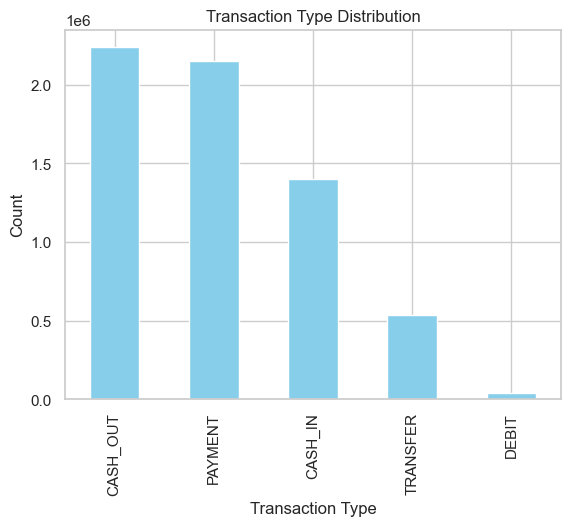

In [12]:
df["type"].value_counts().plot(kind='bar', title = "Transaction Type Distribution", color="skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")

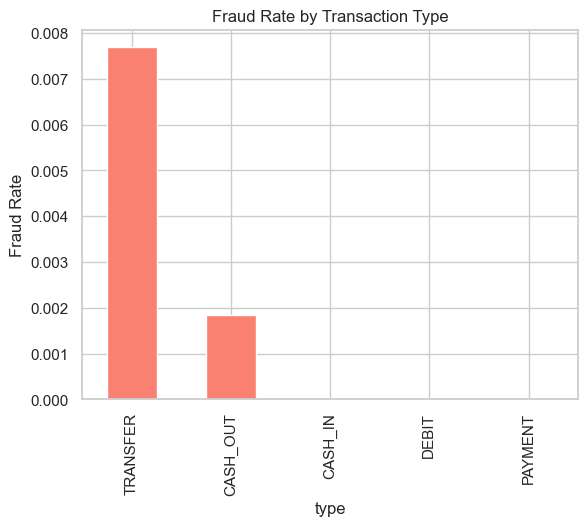

In [13]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', title='Fraud Rate by Transaction Type', color='salmon')
plt.ylabel('Fraud Rate')
plt.show()

In [14]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

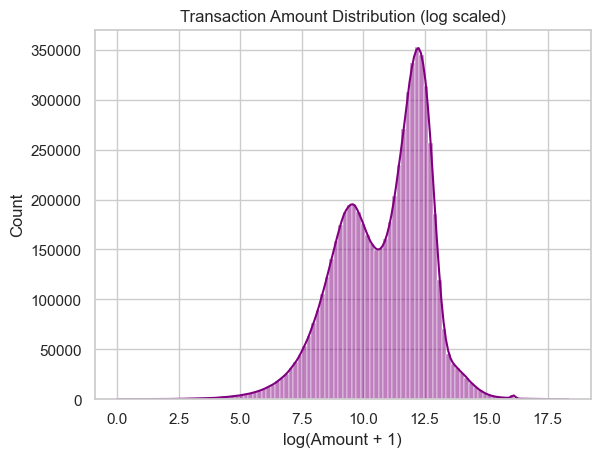

In [15]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color='purple')
plt.title('Transaction Amount Distribution (log scaled)')
plt.xlabel("log(Amount + 1)")
plt.show()

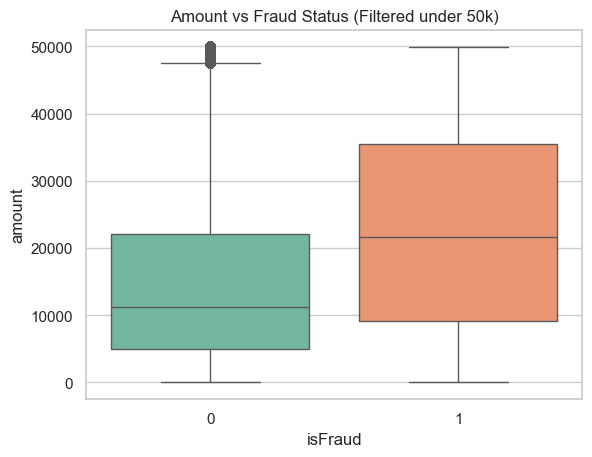

In [16]:
sns.boxplot(data = df[df["amount"]<50000], x='isFraud', y='amount', palette='Set2')
plt.title('Amount vs Fraud Status (Filtered under 50k)')
plt.show()

In [17]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [18]:
df["blanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [19]:
(df["blanceDiffOrig"] < 0).sum()

np.int64(1399253)

In [20]:
(df["balanceDiffDest"] < 0).sum()

np.int64(1238864)

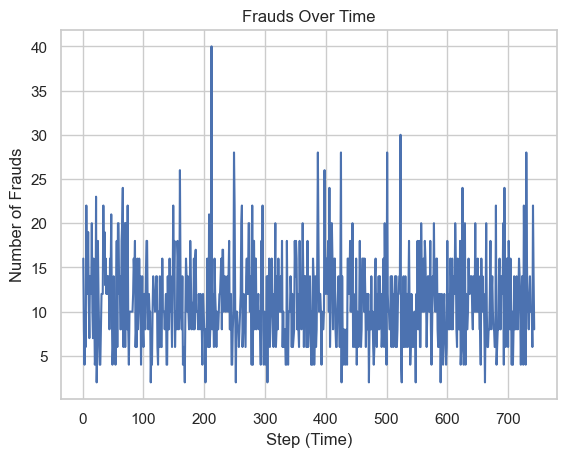

In [21]:
frauds_per_step = df[df["isFraud"] == 1] ["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label = "Frauds per Step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [22]:
df.drop(columns="step", inplace=True)

In [23]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,blanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [24]:
top_senders = df['nameOrig'].value_counts().head(10)

In [25]:
top_receivers = df['nameDest'].value_counts().head(10)

In [26]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [27]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

In [28]:
fraud_users

nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: count, dtype: int64

In [29]:
fraud_types = df[df["type"] .isin(['TRANSFER', 'CASH_OUT'])]

In [30]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

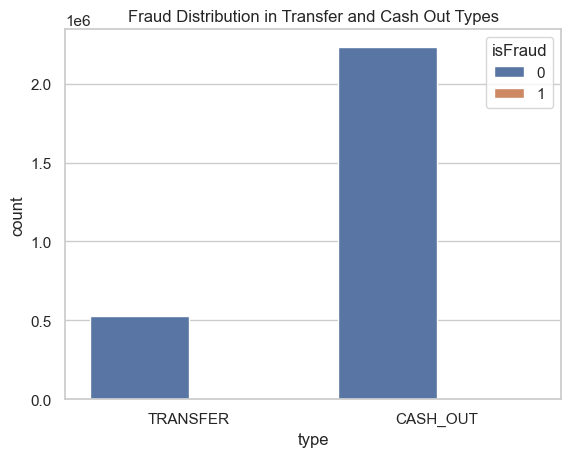

In [31]:
sns.countplot(data=fraud_types, x='type', hue='isFraud')
plt.title('Fraud Distribution in Transfer and Cash Out Types')
plt.show() 

In [32]:
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "blanceDiffOrig", "balanceDiffDest", "isFraud"]].corr() 

In [33]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,blanceDiffOrig,balanceDiffDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.102337,0.845964,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,-0.220297,-0.087032,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.267750,-0.094456,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.047460,0.232316,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,-0.006451,0.436191,0.000535
blanceDiffOrig,0.102337,-0.220297,-0.267750,-0.047460,-0.006451,1.000000,0.169292,0.362472
balanceDiffDest,0.845964,-0.087032,-0.094456,0.232316,0.436191,0.169292,1.000000,0.027028
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,0.362472,0.027028,1.000000


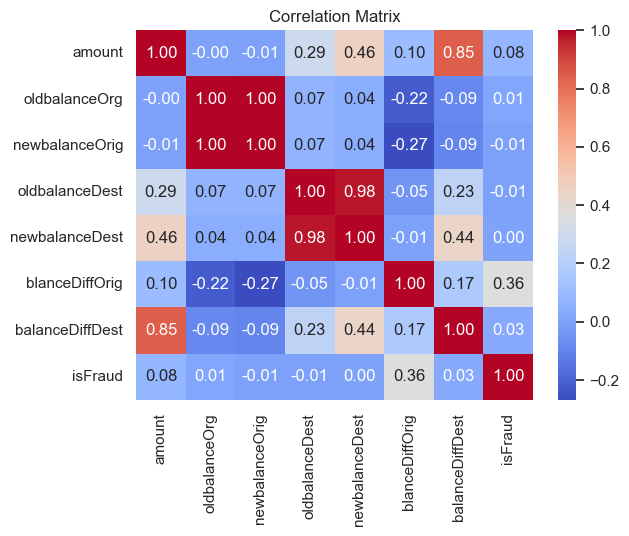

In [34]:
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [35]:
zero_after_transactions = df[(df["oldbalanceOrg"] == 0) & (df["newbalanceOrig"] == 0) & (df["type"] .isin(['TRANSFER', 'CASH_OUT']))]

In [36]:
len(zero_after_transactions)

1308582

In [37]:
zero_after_transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,blanceDiffOrig,balanceDiffDest
48,CASH_OUT,5346.89,C512549200,0.0,0.0,C248609774,652637.00,6453430.91,0,0,0.0,5800793.91
79,TRANSFER,77957.68,C207471778,0.0,0.0,C1761291320,94900.00,22233.65,0,0,0.0,-72666.35
80,TRANSFER,17231.46,C1243171897,0.0,0.0,C783286238,24672.00,0.00,0,0,0.0,-24672.00
81,TRANSFER,78766.03,C1376151044,0.0,0.0,C1749186397,103772.00,277515.05,0,0,0.0,173743.05
82,TRANSFER,224606.64,C873175411,0.0,0.0,C766572210,354678.92,0.00,0,0,0.0,-354678.92


In [38]:
df ["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [40]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,blanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [41]:
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [42]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,blanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [43]:
categorical = ['type']
numeric = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [44]:
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis=1)

In [46]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [49]:
prepossessing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='drop'
)

In [53]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("prep", prepossessing),
    ("clf", LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [54]:
pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [56]:
y_pred = pipeline.predict(x_test)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [59]:
confusion_matrix(y_test, y_pred)

array([[1804217,  102105],
       [    148,    2316]])

In [62]:
pipeline.score(x_test, y_test) * 100

94.64303489233471

In [63]:
import joblib
joblib.dump(pipeline, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']